In [28]:
import numpy as np
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt
import random
import scipy

In [42]:
N_sim = 2
ts = 1
results = []

for n in range(N_sim):

    #Define populations
    N_wolves = random.randint(1,3)
    N_rabbits = random.randint(8, 10)
    N_grass = random.randint(20, 25)

    G = nx.DiGraph()
    
    for i in range(N_rabbits):
        G.add_node(f"Rabbit_{i}", color="gray") 
    for i in range(N_wolves):
        G.add_node(f"Wolf_{i}", color="black")
    for i in range(N_grass):
        G.add_node(f"Blade_{i}", color="green")

    #Define number of edges
    for t in range(ts):
        N_eats = random.randint(0, N_rabbits)
        N_hunts = random.randint(0, int(N_wolves*2))
        N_r_breeds = random.randint(0, int(N_rabbits/2))
        N_w_breeds = random.randint(0, int(N_wolves/2))
        w_dies = random.randint(0, int(N_wolves*0.2))

        #Rabbit eats grass
        for edge in range(N_eats):
            G.add_edge(f"Rabbit_{random.randint(0, N_rabbits-1)}", f"Blade_{random.randint(0, N_grass-1)}", label="eats")

        #Wolf hunts rabbits
        for edge in range(N_wolves):
            G.add_edge(f"Wolf_{random.randint(0, N_wolves-1)}", f"Rabbit_{random.randint(0, N_rabbits-1)}", label="hunts")

        #Rabbit breeds
        rabbit_nodes = [f"Rabbit_{i}" for i in range(N_rabbits)]
        for _ in range(N_r_breeds):
            if len(rabbit_nodes) >= 2:
                rabbit_pair = random.sample(rabbit_nodes, 2)
                G.add_edge(rabbit_pair[0], rabbit_pair[1], label="r_breeds")

        # Wolf breeds
        wolf_nodes = [f"Wolf_{i}" for i in range(N_wolves)]
        for _ in range(N_w_breeds):
            if len(wolf_nodes) >= 2:
                wolf_pair = random.sample(wolf_nodes, 2)
                G.add_edge(wolf_pair[0], wolf_pair[1], label="w_breeds")

        #Count edges to adjust population sizes
        eat_edges = [edge for edge in G.edges(data=True) if edge[2]["label"] == "eats"]
        hunt_edges = [edge for edge in G.edges(data=True) if edge[2]["label"] == "hunts"]
        r_breed_edges = [edge for edge in G.edges(data=True) if edge[2]["label"] == "r_breeds"]
        w_breed_edges = [edge for edge in G.edges(data=True) if edge[2]["label"] == "w_breeds"]

        #Update populations
        N_rabbits = max(0, N_rabbits - len(hunt_edges) + len(r_breed_edges) * 3)
        N_wolves = max(0, N_wolves - w_dies + len(w_breed_edges))
        N_grass = max(0, int((N_grass - len(eat_edges))*3))

        if N_rabbits == 0:
            raise ValueError("All rabbits have died")
        if N_grass == 0:
            raise ValueError("Grass has gone to zero")
        if N_wolves == 0:
            raise ValueError("All wolves have died")

        #Clear current state
        G.clear()

        for i in range(N_rabbits):
            G.add_node(f"Rabbit_{i}", color="gray") 
        for i in range(N_wolves):
            G.add_node(f"Wolf_{i}", color="black")
        for i in range(N_grass):
            G.add_node(f"Blade_{i}", color="green")

        #Rabbit eats grass
        for edge in range(N_eats):
            G.add_edge(f"Rabbit_{random.randint(0, N_rabbits-1)}", f"Blade_{random.randint(0, N_grass-1)}", label="eats")

        #Wolf hunts rabbits
        for edge in range(N_wolves):
            G.add_edge(f"Wolf_{random.randint(0, N_wolves-1)}", f"Rabbit_{random.randint(0, N_rabbits-1)}", label="hunts")

        #Rabbit breeds
        rabbit_nodes = [f"Rabbit_{i}" for i in range(N_rabbits)]
        for _ in range(N_r_breeds):
            if len(rabbit_nodes) >= 2:
                rabbit_pair = random.sample(rabbit_nodes, 2)
                G.add_edge(rabbit_pair[0], rabbit_pair[1], label="r_breeds")

        # Wolf breeds
        wolf_nodes = [f"Wolf_{i}" for i in range(N_wolves)]
        for _ in range(N_w_breeds):
            if len(wolf_nodes) >= 2:
                wolf_pair = random.sample(wolf_nodes, 2)
                G.add_edge(wolf_pair[0], wolf_pair[1], label="w_breeds")

       
        
        results.append(G)

G = results[1]

In [43]:
def network_plot(G, sim):

    node_filter = [node for node in G.nodes if G.nodes[node].get('color') is not None]
    colors = [G.nodes[node]['color'] for node in node_filter]

    plt.figure(figsize=(10,7))

    pos = nx.spring_layout(G.subgraph(node_filter), k=0.5, iterations=50)
    nx.draw(G.subgraph(node_filter), pos, node_color=colors, node_size=100)

    label_pos = {node: (x, y - 0.05) for node, (x, y) in pos.items()}
    nx.draw_networkx_labels(G.subgraph(node_filter), label_pos, font_size=8, verticalalignment='top')

    edge_labels = nx.get_edge_attributes(G.subgraph(node_filter), 'label')
    nx.draw_networkx_edge_labels(G.subgraph(node_filter), pos, edge_labels=edge_labels)

    plt.title(f'Simulation {sim}')
    return plt.show()

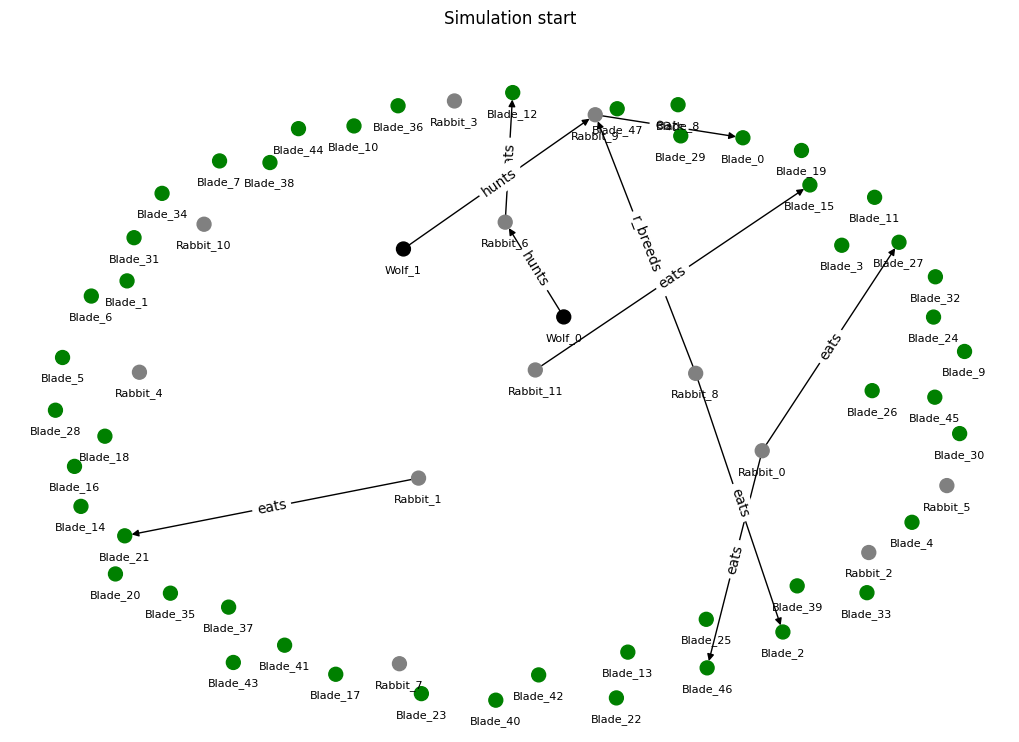

In [45]:
network_plot(G, 'start')